
   ### Equation :  d<sup>2</sup>y/dx<sup>2</sup> = (1+x +y)<sup>3</sup>/3 </br></br>

   #### Conditions - </br>
      y(0) = 0, y(1) = 0   
      

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
dx = 0.01
n = int(1.0/dx)
X = np.linspace(0, 1, n+1)

# Initial Assumption
Y = X*(X-1)

In [37]:
def thomas_algo(a, b, c, d):
    n = len(d)
    c_ = [0 for i in range(n)]
    d_ = [0 for i in range(n)]
    y = [0 for i in range(n)]

    c_[0] = c[0] / (1.0 * b[0])
    d_[0] = d[0] / (1.0 * b[0])
    
    for i in range(1,n):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])
    
    y[n-1] = d_[n-1]
    for i in range(n-2, -1, -1):
        y[i] = d_[i] - c_[i]*y[i+1]

    return y

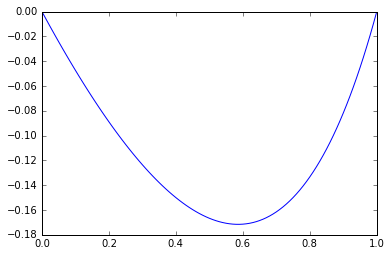

In [39]:
k = 10

for i in range(k):
    # We write a_i * Dy_(i-1) + b_i * Dy_i + c_i * Dy_(i+1) = d_i
    A = np.array([1.0/dx**2 for i in range(1, n)], dtype=np.float64)
    B = np.array([-2.0/dx**2 - 1.5 * (1 + X[i] +Y[i])**2 for i in range(1, n)], dtype=np.float64)
    C = np.array([1.0/dx**2 for i in range(1, n)], dtype=np.float16)

    D = np.array([(Y[i+1] - 2*Y[i] + Y[i-1]) / (-1*dx**2) + 0.5*(1 + X[i] +Y[i])**3
            for i in range(1, n)], dtype=np.float64)
    DY = np.array([0] + thomas_algo(A, B, C, D) + [0], dtype=np.float64)
    Y = Y + DY
plt.plot(X, Y)